In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def combine_db_by_iso(iso, time, dbs, weights):
    v = 0
    for i in range(len(dbs)):
        try:
            v += list(dbs[i][(dbs[i]['TIME']==iso)][time])[0] * weights[i]
        except:
            v += 0
    return v

def combine_dbs_by_isoweights(dbs, weights):
    x = pd.concat(dbs)
    isos = np.insert(x['TIME'].unique(), 0, 'FLUENCE')
    times = x.columns[1:]
    y = []
    for t in times:
        temp = [t]
        for i in isos[1:]:  
            temp.append(combine_db_by_iso(i, t, dbs, weights))
        y.append(temp)
    z = pd.DataFrame(y, columns=isos)
    z['BUd'] = z['BUd'].cumsum()
    return z    

def db_slice_values(db, target_column, target_value):
    cols = db.columns
    t_array = []
    db1 = db[:1]
    db2 = db[-1:]
    x1 = db1[target_column].values[0]
    delta_x = db2[target_column].values[0] - x1
    x = target_value - x1
    for c in cols:
        if c == target_column:
            t_array.append(target_value)
        else:
            y1 = float(db1[c].values[0])
            y2 = float(db2[c].values[0])
            t_array.append(y1 + x*(y2-y1)/(delta_x))
    db.loc[-1] = t_array
    db.index =db.index + 1
    db.sort_index(inplace=True)
    return db

def iso_range(lower, upper, iso, z):
    BU_range = range(lower, upper)
    iso_array = np.zeros(len(BU_range))
    z1 = z[(z['BUd'] > lower) & (z['BUd'] < upper)]
    for i in range(len(BU_range)):
        z2 = db_slice_values(z1, 'BUd', BU_range[i])
        iso_array[i] = (z2[iso].values[0]/1000)
    return iso_array

In [14]:
U235 = pd.read_csv('LWRU235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('LWRU238.csv')
U238.fillna(0, inplace=True)
e = 0.05
lower = 10
upper = 60
z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])
PU238x = iso_range(lower, upper, 'PU238', z)
PU239x = iso_range(lower, upper, 'PU239', z)
PU240x = iso_range(lower, upper, 'PU240', z)
PU241x = iso_range(lower, upper, 'PU241', z)
PU242x = iso_range(lower, upper, 'PU242', z)

C:\Users\Robert\AppData\Local\Temp\ipykernel_16800\1900076376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\Local\Temp\ipykernel_16800\1900076376.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.sort_index(inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_16800\1900076376.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\

In [17]:
bu_dict = {}
j = 0
e=1.0
for i in range(10, 60):
    temp = [0.0071*(1-e), 0.9929*(1-e), PU238x[j]*e, PU239x[j]*e, PU240x[j]*e, PU241x[j]*e, PU242x[j]*e]
    bu_dict[i] = np.array(temp)
    j+=1
for i in range(10, 60):
    print(i, bu_dict[i]/bu_dict[i].sum())

10 [0.00000000e+00 0.00000000e+00 5.55185501e-04 8.62047655e-01
 1.13086609e-01 2.42235455e-02 8.70048429e-05]
11 [0.         0.         0.00296224 0.8389697  0.1181804  0.03392023
 0.00596744]
12 [0.         0.         0.00517475 0.81775692 0.1228625  0.04283321
 0.01137261]
13 [0.         0.         0.00721539 0.79819199 0.12718089 0.05105383
 0.0163579 ]
14 [0.         0.         0.00910344 0.78009006 0.13117636 0.05865972
 0.02097041]
15 [0.         0.         0.01085539 0.76329297 0.13488384 0.06571737
 0.02525043]
16 [0.         0.         0.01248545 0.74766452 0.13833336 0.07228399
 0.02923268]
17 [0.         0.         0.01400592 0.73308686 0.14155095 0.07840909
 0.03294717]
18 [0.         0.         0.01542748 0.71945747 0.14455925 0.08413576
 0.03642005]
19 [0.         0.         0.01675948 0.70668672 0.14737802 0.08950166
 0.03967413]
20 [0.         0.         0.01801013 0.69469596 0.15002463 0.09453982
 0.04272946]
21 [0.         0.         0.01918665 0.68341584 0.15251439 

Text(0.5, 0, 'Spent Fuel Burnup (MWd/kgIHM)')

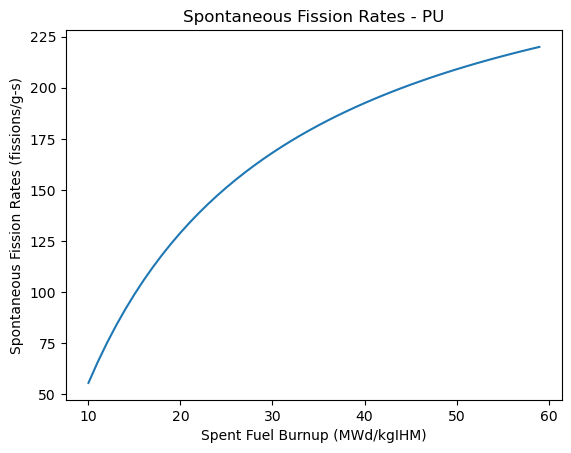

In [30]:
spont_fiss = np.array([8.14e4*7.0e-9, 1.24e4*5.5e-7, 17*3.7e10*1.9e-9, 2.2966e9*3.0e-12, 2.3e-1*3.7e10*5.7e-8, 100*3.7e10*2.4e-16, 0.004*3.7e10*5.5e-6])
neutrons = np.array([1.86, 2.07, 0, 2.16, 2.21, 0, 0])
burns = []
rates = []
for bu, vals in bu_dict.items():
    burns.append(bu)
    vals = vals/vals.sum()
    spont = vals*spont_fiss
    rates.append(spont.sum())
plt.plot(burns, rates)
plt.title('Spontaneous Fission Rates - PU')
plt.ylabel('Spontaneous Fission Rates (fissions/g-s)')
plt.xlabel('Spent Fuel Burnup (MWd/kgIHM)')

Text(0.5, 0, 'Spent Fuel Burnup (MWd/kgIHM)')

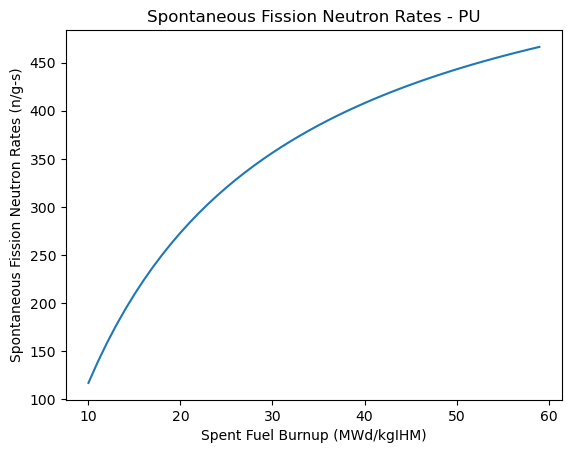

In [31]:
spont_fiss = np.array([8.14e4*7.0e-9, 1.24e4*5.5e-7, 2.59e3, 2.18e-2, 1.02e3, 5e-2, 1.72e3])
burns = []
rates = []
for bu, vals in bu_dict.items():
    burns.append(bu)
    vals = vals/vals.sum()
    spont = vals*spont_fiss
    rates.append(spont.sum())
plt.plot(burns, rates)
plt.title('Spontaneous Fission Neutron Rates - PU')
plt.ylabel('Spontaneous Fission Neutron Rates (n/g-s)')
plt.xlabel('Spent Fuel Burnup (MWd/kgIHM)')

Text(0.5, 0, 'Spent Fuel Burnup (MWd/kgIHM)')

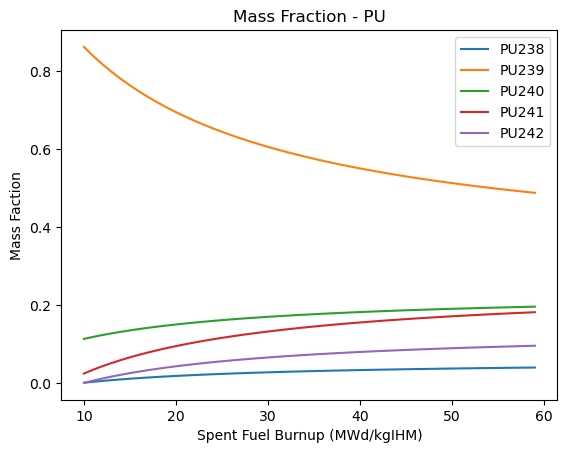

In [32]:
sum = []
for i in range(len(PU238x)):
    sum.append(PU238x[i]+PU239x[i]+PU240x[i]+PU241x[i]+PU242x[i])
sum = np.array(sum)
plt.plot(burns, PU238x/sum, label='PU238')
plt.plot(burns, PU239x/sum, label='PU239')
plt.plot(burns, PU240x/sum, label='PU240')
plt.plot(burns, PU241x/sum, label='PU241')
plt.plot(burns, PU242x/sum, label='PU242')
plt.legend()
plt.title('Mass Fraction - PU')
plt.ylabel('Mass Faction')
plt.xlabel('Spent Fuel Burnup (MWd/kgIHM)')

Text(0.5, 0, 'HALEU Enrichment (%U235)')

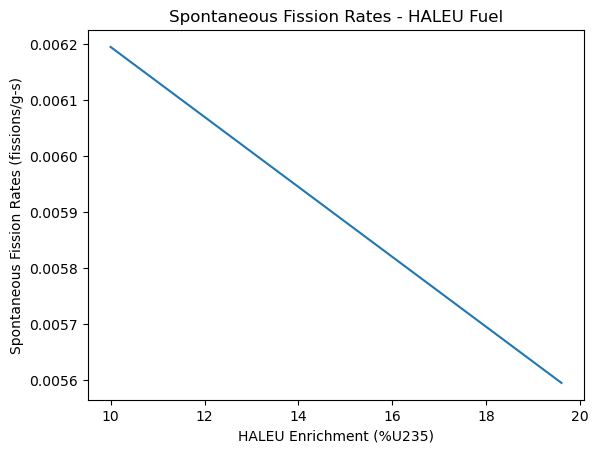

In [29]:
spont_fiss = np.array([8.14e4*7.0e-9, 1.24e4*5.5e-7])
enrich = []
rates = []
for i in np.arange(10, 19.6, 0.1):
    vals = [i*10, 1000-(i*10)]
    spont = vals*spont_fiss/1000
    enrich.append(i)
    rates.append(spont.sum())
plt.plot(enrich, rates)
plt.title('Spontaneous Fission Rates - HALEU Fuel')
plt.ylabel('Spontaneous Fission Rates (fissions/g-s)')
plt.xlabel('HALEU Enrichment (%U235)')

In [8]:
U235 = pd.read_csv('MOXU235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('MOXU238.csv')
U238.fillna(0, inplace=True)
PU238 = pd.read_csv('MOXPU238.csv')
PU238.fillna(0, inplace=True)
PU239 = pd.read_csv('MOXPU239.csv')
PU239.fillna(0, inplace=True)
PU240 = pd.read_csv('MOXPU240.csv')
PU240.fillna(0, inplace=True)
PU241 = pd.read_csv('MOXPU241.csv')
PU241.fillna(0, inplace=True)
PU242 = pd.read_csv('MOXPU242.csv')
PU242.fillna(0, inplace=True)

In [9]:
iso_list = [U235, U238, PU238, PU239, PU240, PU241, PU242]
crit = []
for i in range(20, 60):
    z = combine_dbs_by_isoweights(iso_list, bu_dict[i])
    crit.append(z['NEUT_PROD'][1]/z['NEUT_DEST'][1])
plt.plot(np.arange(20, 60, 1), crit)
plt.ylabel('Criticality')
plt.xlabel('Spend Fuel Burnup (MWd/kgIHM)')
plt.title('Spent Fuel PU Criticality')

KeyError: 20